In [47]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import itertools
import os
from root_numpy import root2array, root2rec, tree2rec, array2root
%matplotlib inline

In [48]:
#f_tll = TFile("ana.root","READ")

f = ROOT.TFile('ana.root')
t = f.Get('lin_tree')
df = pd.DataFrame(tree2rec(t)) #,branches=['_pi0_energy','_clus_nhits_v','_clus_vtxdist_v','_clus_plane_v']))


/Users/ah673/Library/Python/2.7/lib/python/site-packages/root_numpy/_tree.py:423: DeprecationWarning: tree2rec is deprecated and will be removed in 5.0.0. Instead use tree2array(...).view(np.recarray)
  DeprecationWarning)


In [49]:
df.head()


,lin,tll,nhits,is_shower,length
0,0.577606,3.428250,79,1,45.279850
1,0.300488,0.643125,70,1,48.857357
2,0.130305,3.281514,113,1,20.823875
3,0.080401,1.638858,108,1,26.264605
4,0.108818,1.578239,75,0,20.283895


In [50]:
sh_v = [ df['tll'][i] for i in xrange(df['tll'].shape[0]) if df['is_shower'][i] == 1 ]
sh_hit_v = [ df['nhits'][i] for i in xrange(df['tll'].shape[0]) if df['is_shower'][i] == 1 ]
sh_length_v = [ df['length'][i] for i in xrange(df['tll'].shape[0]) if df['is_shower'][i] == 1 ]



tr_v = [ df['tll'][i] for i in xrange(df['tll'].shape[0]) if df['is_shower'][i] == 0 ]
tr_hit_v = [ df['nhits'][i] for i in xrange(df['tll'].shape[0]) if df['is_shower'][i] == 0 ]
tr_length_v = [ df['length'][i] for i in xrange(df['tll'].shape[0]) if df['is_shower'][i] == 0 ]

print len(sh_v), len(tr_v)

645 267


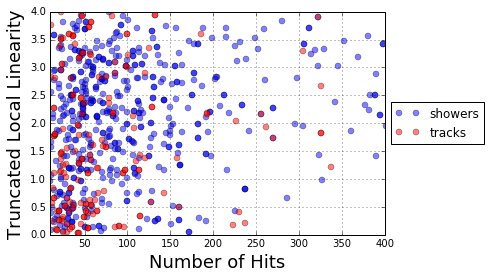

In [80]:
plt.figure()
plt.plot(sh_hit_v,sh_v,'bo',alpha=0.5,label='showers')
plt.plot(tr_hit_v,tr_v,'ro',alpha=0.5,label='tracks')
plt.grid(True)
plt.xlim(10,400)
plt.ylim(0.0,4)
#plt.yscale('log')
plt.xlabel("Number of Hits",fontsize=18)
plt.ylabel("Truncated Local Linearity",fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.hlines(y=0.32, xmin=10, xmax=30,lw=5)#, hold=None,c='k')
# plt.hlines(y=0.64, xmin=30, xmax=70,lw=5)# hold=None,c='k')
# plt.hlines(y=0.7, xmin=70, xmax=130,lw=5)# hold=None,c='k')
# plt.hlines(y=0.82, xmin=130, xmax=180,lw=5)# hold=None,c='k')
# plt.hlines(y=0.9, xmin=180, xmax=230,lw=5)# hold=None,c='k')


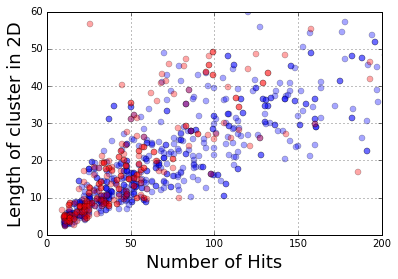

In [83]:
plt.figure()
plt.plot(sh_hit_v,sh_length_v,'bo',alpha=0.35,label='showers')
plt.plot(tr_hit_v,tr_length_v,'ro',alpha=0.35,label='tracks')
plt.grid(True)
plt.xlim(0,200)
plt.ylim(0.001,60)
plt.xlabel("Number of Hits",fontsize=18)
plt.ylabel("Length of cluster in 2D",fontsize=18)

#plt.yscale('log')